In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load the cleaned data
df = pd.read_csv("../data/processed/uber_data_cleaned.csv")

In [6]:
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

In [7]:
# Subset to lat/lon
location_df = df[['latitude', 'longitude']].dropna()

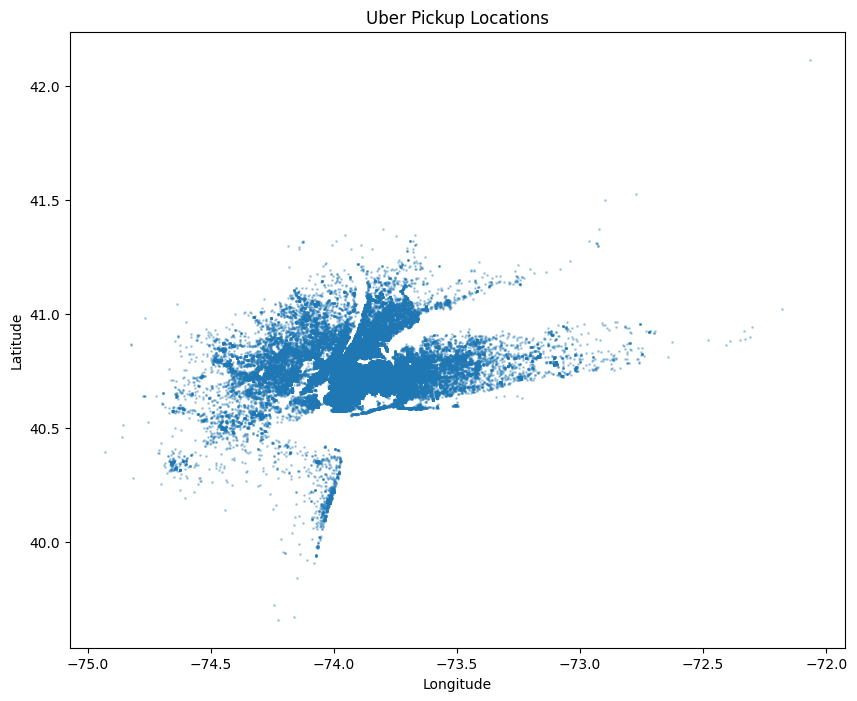

In [8]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(location_df['longitude'], location_df['latitude'], s=1, alpha=0.3)
plt.title("Uber Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

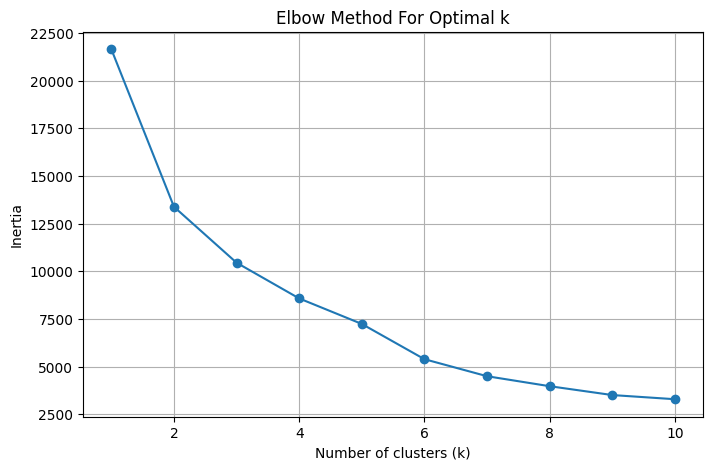

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Only take lat/lon for clustering
X = location_df[['latitude', 'longitude']]

# Calculate inertia for different values of k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [18]:
# Apply KMeans clustering
from sklearn.cluster import KMeans

# Assuming you've already standardized column names
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
location_df['cluster'] = kmeans.fit_predict(location_df[['latitude', 'longitude']])

/Users/abhishek/Documents/uber-hotspot-detection/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


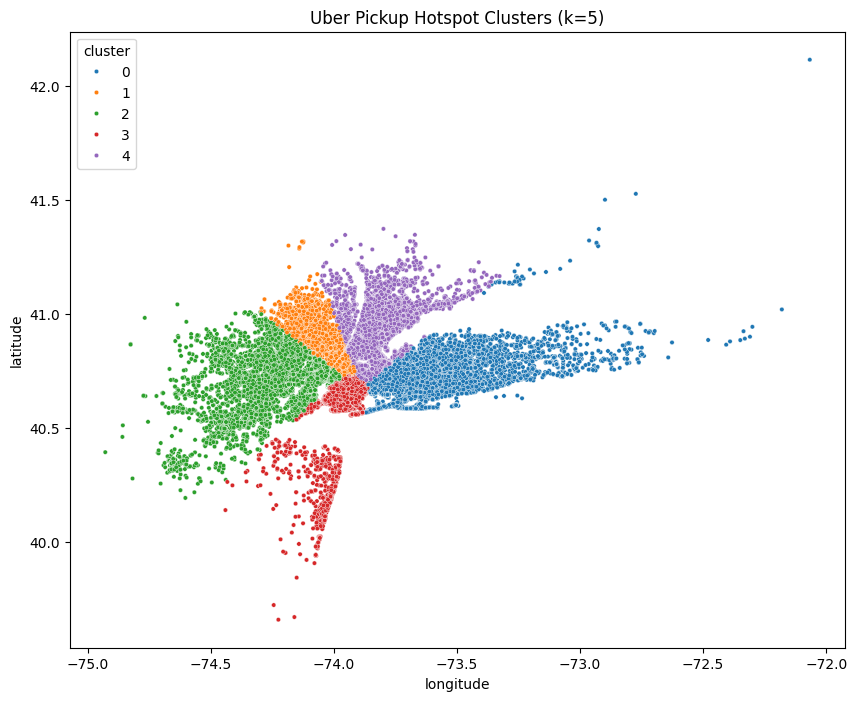

In [22]:
#plotting clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=location_df,
    x='longitude',
    y='latitude',
    hue='cluster',
    palette='tab10',
    s=10
)
plt.title(f'Uber Pickup Hotspot Clusters (k={k})')
plt.show()

In [23]:
print(location_df.columns)

Index(['latitude', 'longitude', 'Cluster', 'cluster'], dtype='object')


In [24]:
print(location_df.head())

   latitude  longitude  Cluster  cluster
0   40.7690   -73.9549        1        1
1   40.7267   -74.0345        2        2
2   40.7316   -73.9873        2        2
3   40.7588   -73.9776        1        1
4   40.7594   -73.9722        1        1


In [25]:
!pip install folium

     |████████████████████████████████| 113 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 8.5 MB/s  eta 0:00:01
You should consider upgrading via the '/Users/abhishek/Documents/uber-hotspot-detection/venv/bin/python3 -m pip install --upgrade pip' command.


In [26]:
#to open uber_clusters_map.html in your browser.
import folium
from folium.plugins import MarkerCluster

# Center map at mean coordinates
m = folium.Map(location=[location_df['latitude'].mean(), location_df['longitude'].mean()], zoom_start=12)

# Add clustered markers
marker_cluster = MarkerCluster().add_to(m)

for idx, row in location_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.3
    ).add_to(marker_cluster)

# Save to HTML
m.save("uber_clusters_map.html")

/Users/abhishek/Documents/uber-hotspot-detection/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [27]:
location_df.to_csv('../data/processed/uber_clustered.csv', index=False)